In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
import statsmodels.api as sm
%reload_ext rpy2.ipython

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
df = pd.read_csv('RegressionProject_HousePrices_n4000_seed5316.csv')

we can see here that almost all our column are not null exceplt the year_renovated column and that is for the houses that are not renovated yet. we can also see the data types and the overall character for our data set

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             4000 non-null   int64  
 1   size_sqft         4000 non-null   int64  
 2   lot_sqft          4000 non-null   int64  
 3   bedrooms          4000 non-null   int64  
 4   bathrooms         4000 non-null   float64
 5   year_built        4000 non-null   int64  
 6   year_renovated    1255 non-null   float64
 7   renovated         4000 non-null   object 
 8   condition         4000 non-null   object 
 9   location_quality  4000 non-null   object 
 10  dist_center_km    4000 non-null   float64
 11  crime_rate        4000 non-null   float64
 12  school_rating     4000 non-null   int64  
 13  has_pool          4000 non-null   object 
 14  garage_cars       4000 non-null   int64  
 15  waterfront        4000 non-null   object 
dtypes: float64(4), int64(7), object(5)
memory 

In [14]:
df.head()

,price,size_sqft,lot_sqft,bedrooms,bathrooms,year_built,year_renovated,renovated,condition,location_quality,dist_center_km,crime_rate,school_rating,has_pool,garage_cars,waterfront
0,18389800,2588,3901,4,4.0,2001,NaN,No,Fair,Medium,16.93,42.8,6,No,3,No
1,22831700,2363,4640,5,3.5,1997,NaN,No,Good,Medium,17.68,30.5,8,Yes,3,No
2,4196200,1050,2000,2,2.5,1961,NaN,No,Poor,Medium,24.38,37.0,7,No,0,Yes
3,124268900,3381,9221,5,4.5,1999,NaN,No,Fair,Premium,2.71,6.5,10,Yes,3,No
4,14971300,1991,6869,3,1.5,1995,NaN,No,Fair,Premium,4.55,23.4,10,No,1,No


In [15]:
df['transformed_price'] = np.log(df['price'])

In [16]:
CURRENT_YEAR = pd.Timestamp.now().year
df['years_since_renovated'] = np.where(
    df['renovated'] == 'Yes',
    CURRENT_YEAR - df['year_renovated'],
    0
)
df = df.drop(columns=['year_renovated'])
df['house_age'] = CURRENT_YEAR - df['year_built']
df = df.drop(columns=['year_built'])

In [17]:
countinous_numerical = ['price', 'size_sqft', 'lot_sqft', 'house_age','years_since_renovated',
       'dist_center_km', 'crime_rate', 'transformed_price']
discrete_numerical = ['bedrooms', 'bathrooms', 'school_rating','garage_cars']
categorical = ['renovated', 'condition','location_quality', 'has_pool', 'waterfront']
numerical = countinous_numerical + discrete_numerical

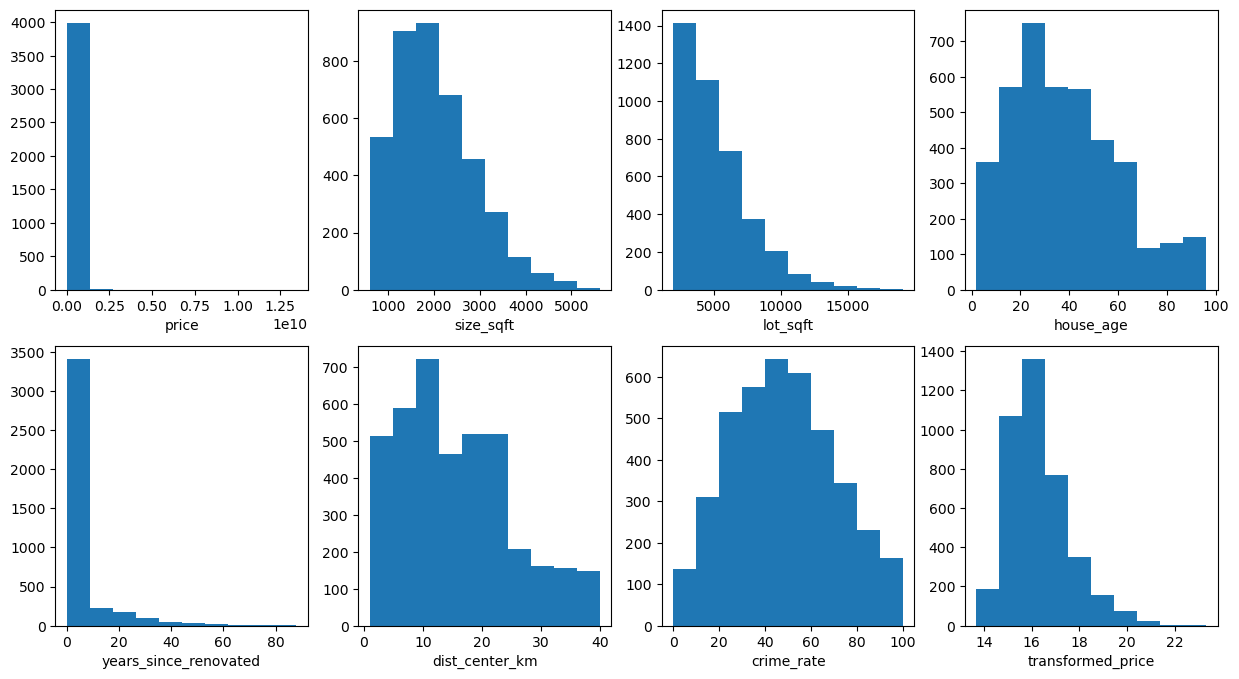

In [18]:
fig, axes = plt.subplots(2,4, figsize = (15,8))
axes =axes.ravel()
for i, cols in enumerate(df[countinous_numerical].columns):
    axes[i].hist(x=cols, data=df)
    axes[i].set_xlabel(cols)
    


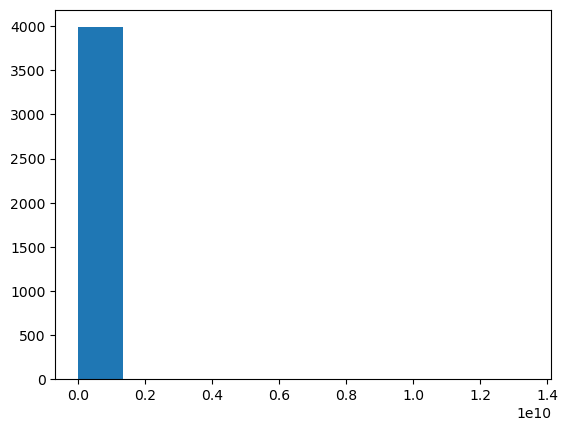

In [19]:
plt.hist(x=df['price'])
plt.show()

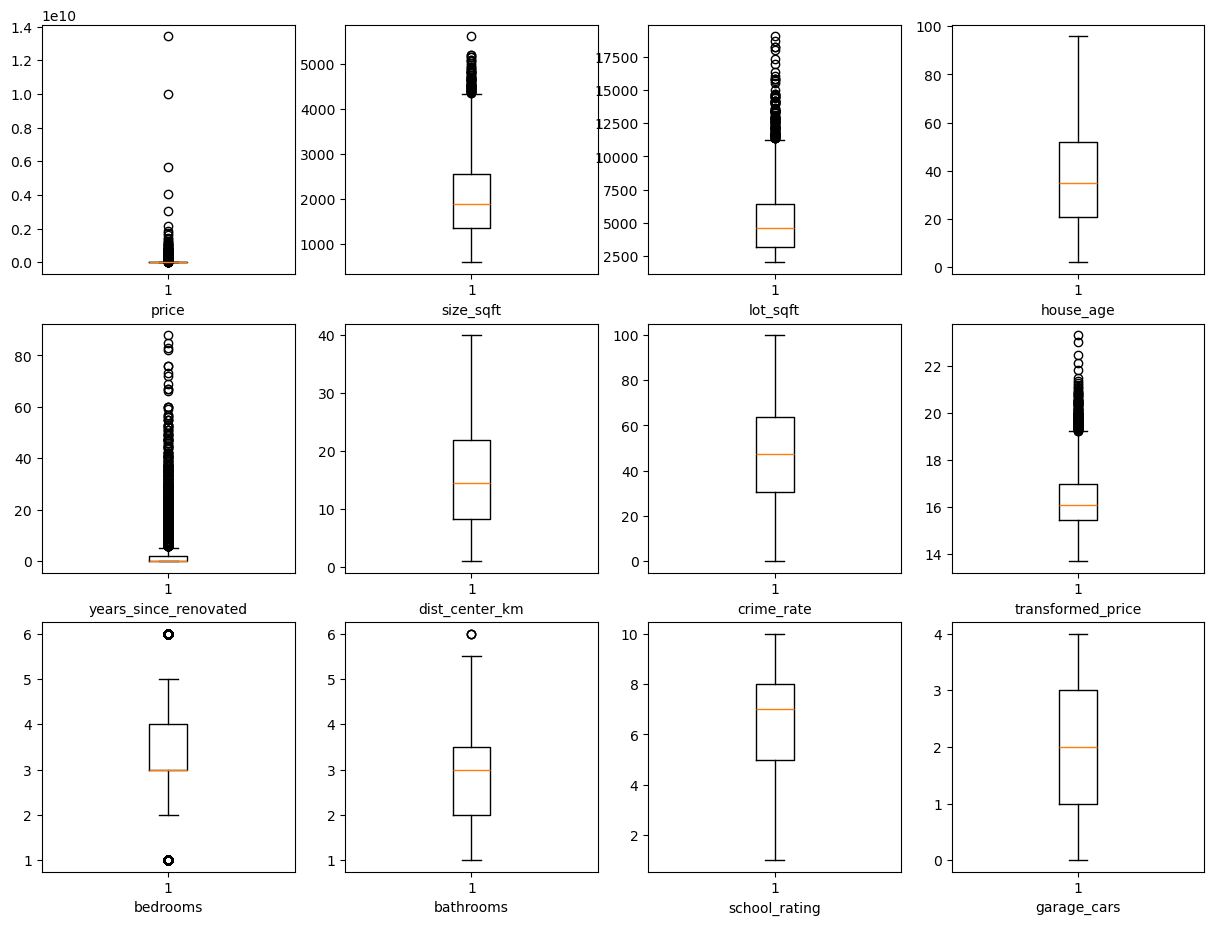

In [20]:
fig, axes = plt.subplots(3,4, figsize = (15,11))
axes =axes.ravel()
for i, cols in enumerate(df[numerical].columns):
    axes[i].boxplot(x=cols, data=df[numerical])
    axes[i].set_xlabel(cols)
    


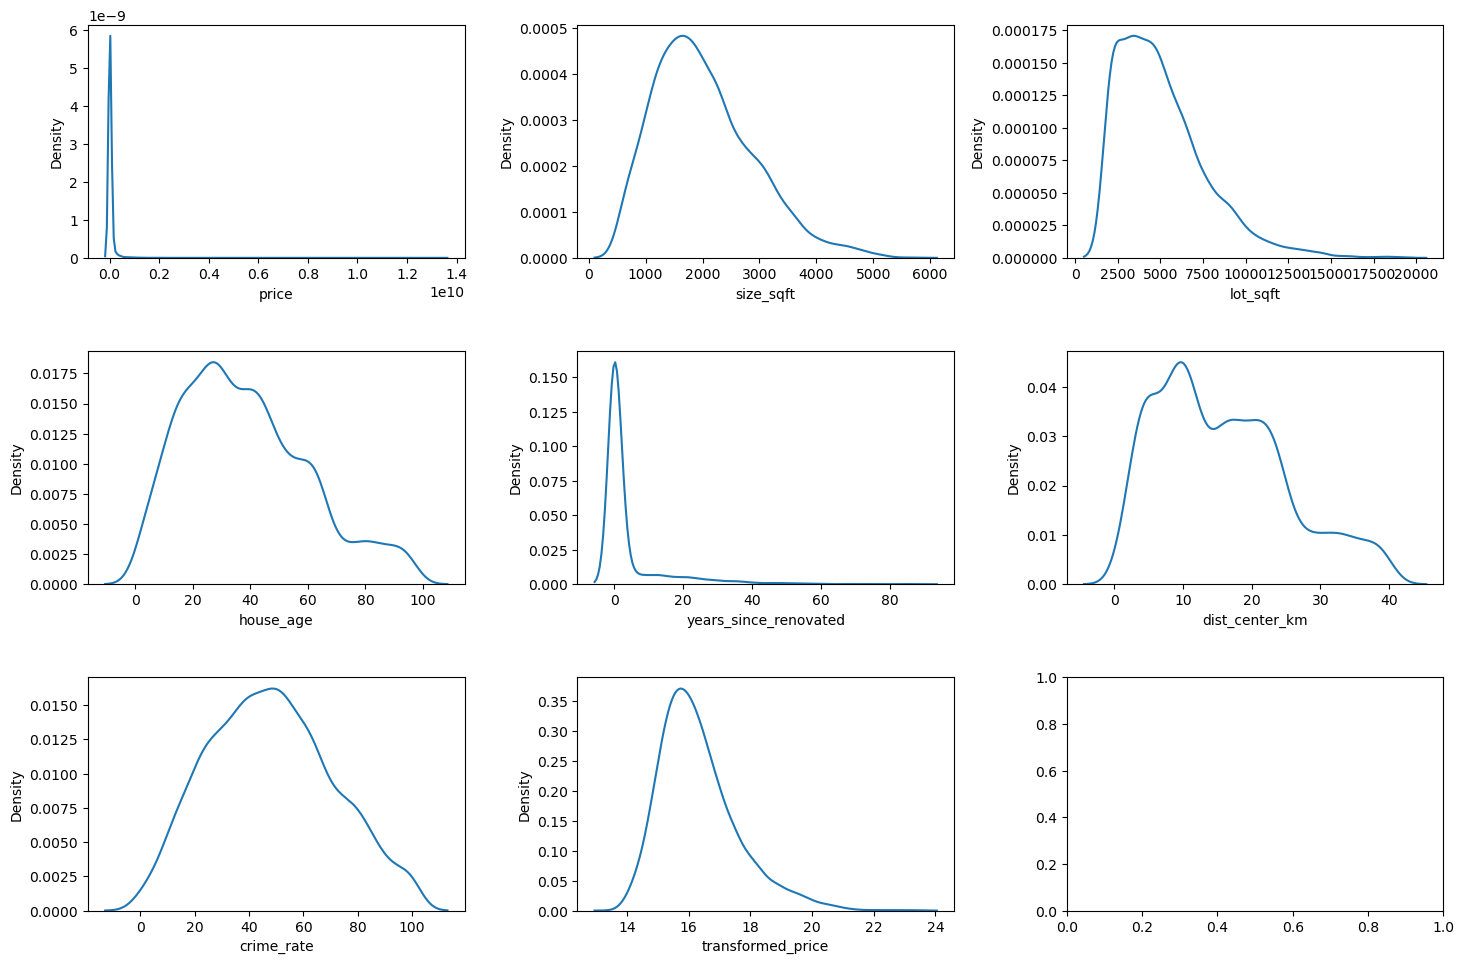

In [21]:
fig, axes = plt.subplots(3,3, figsize = (15,10))
axes =axes.ravel()
for i, cols in enumerate(df[countinous_numerical].columns):
    sns.kdeplot(data=df[countinous_numerical], x=cols, ax=axes[i])
    axes[i].set_xlabel(cols)

fig.tight_layout(pad=2.0)
fig.subplots_adjust(hspace=0.4, wspace=0.3)
    


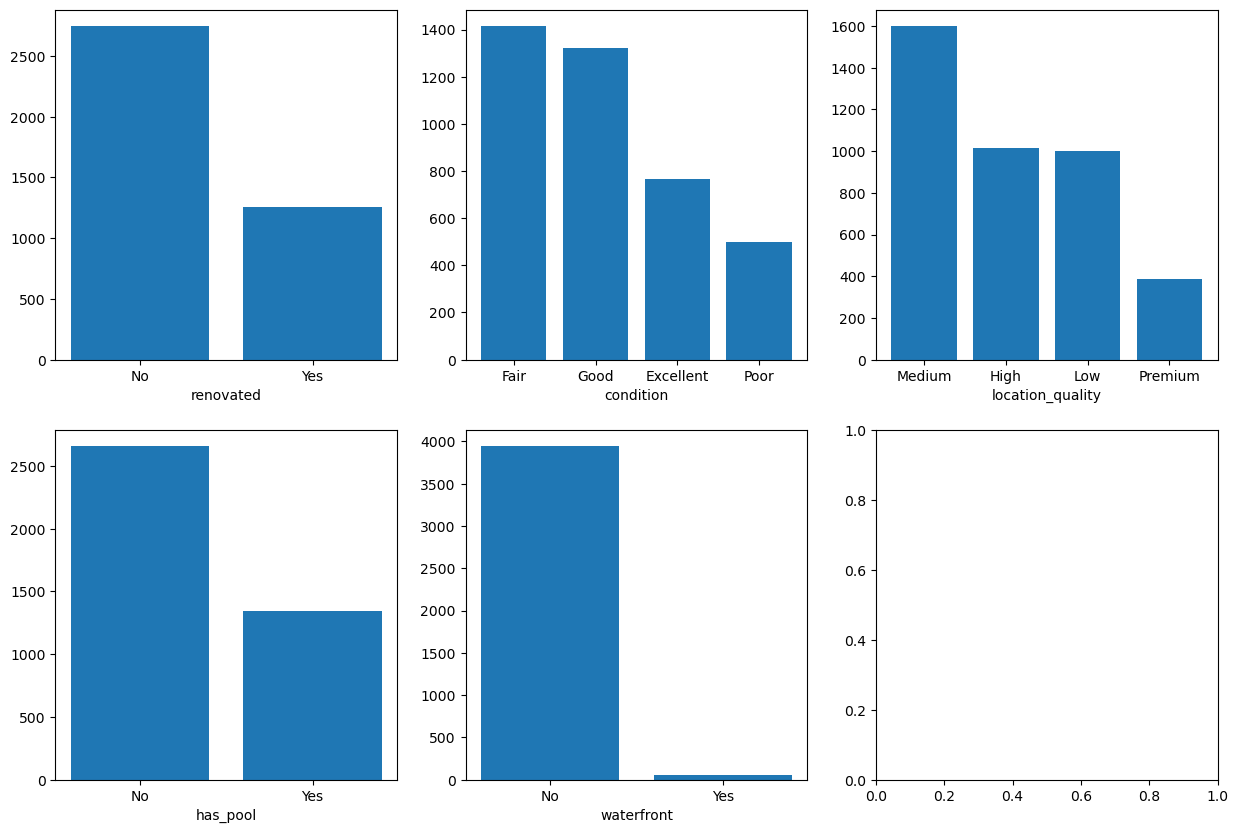

In [22]:
fig, axes = plt.subplots(2,3, figsize = (15,10))
axes =axes.ravel()
for i, cols in enumerate(df[categorical].columns):
    axes[i].bar(x=df[cols].value_counts().index, height=df[cols].value_counts().values)
    axes[i].set_xlabel(cols)

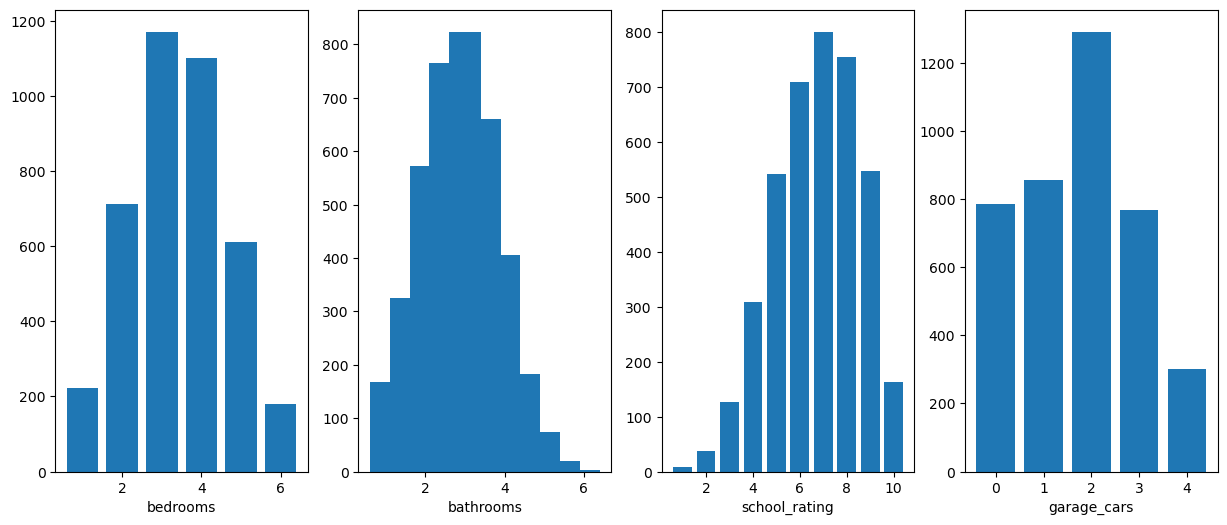

In [23]:
fig, axes = plt.subplots(1,4, figsize = (15,6))
axes =axes.ravel()
for i, cols in enumerate(df[discrete_numerical].columns):
    axes[i].bar(x=df[cols].value_counts().index, height=df[cols].value_counts().values)
    axes[i].set_xlabel(cols)

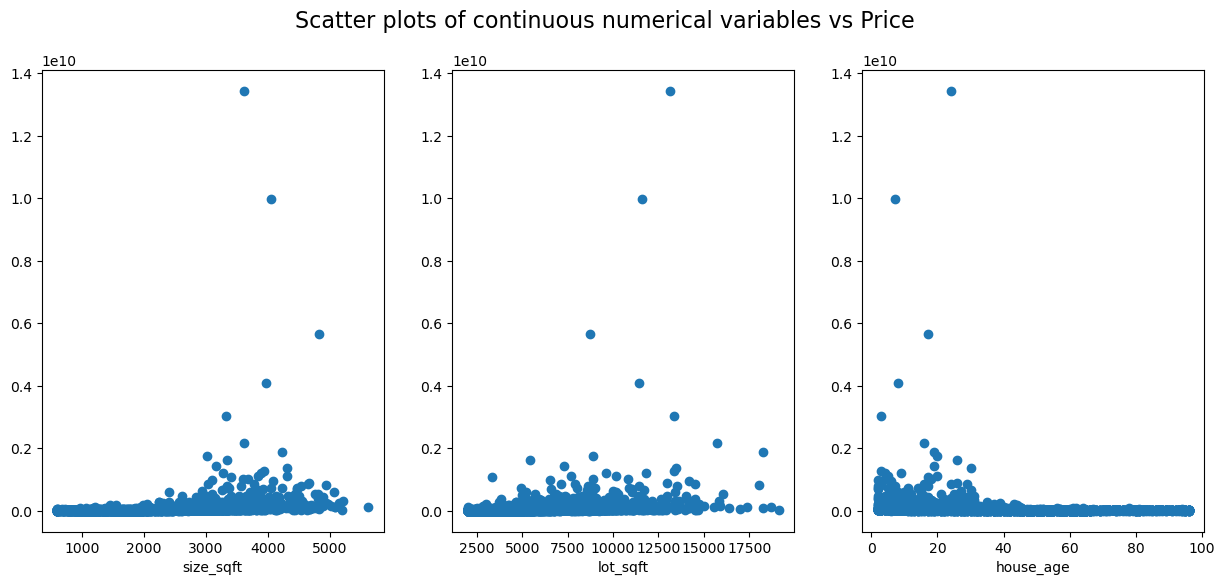

In [24]:
fig, axes = plt.subplots(1,3, figsize = (15,6))
fig.suptitle('Scatter plots of continuous numerical variables vs Price', fontsize=16)
axes =axes.ravel()
for i, cols in enumerate(df[countinous_numerical[1:4]].columns):
    axes[i].scatter(x=df[cols], y=df['price'])
    axes[i].set_xlabel(cols)

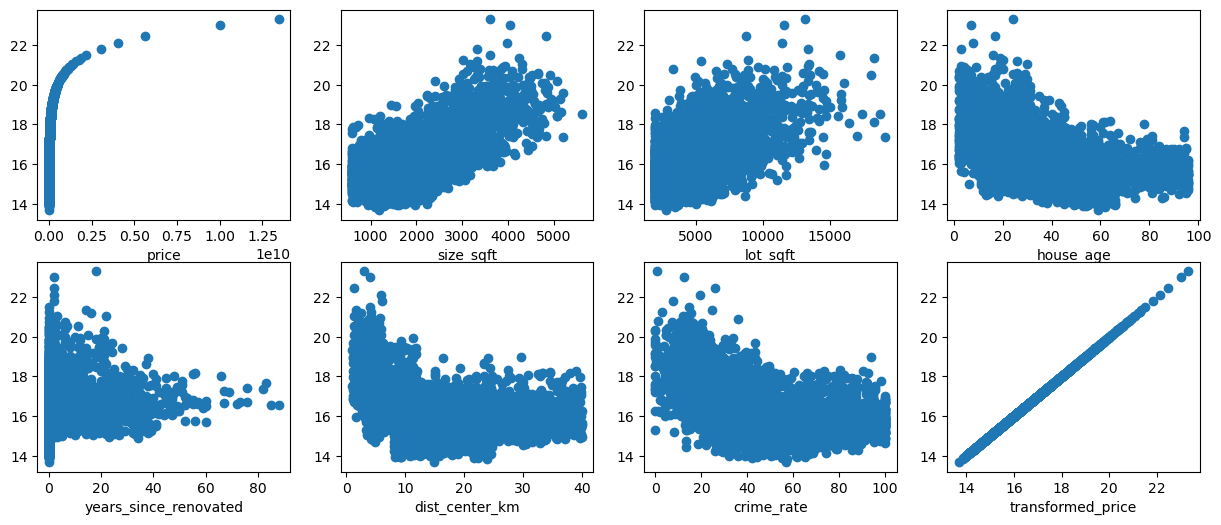

In [25]:
fig, axes = plt.subplots(2,4, figsize = (15,6))
axes =axes.ravel()
for i, cols in enumerate(df[countinous_numerical].columns):
    axes[i].scatter(x=df[cols], y=df['transformed_price'])
    axes[i].set_xlabel(cols)

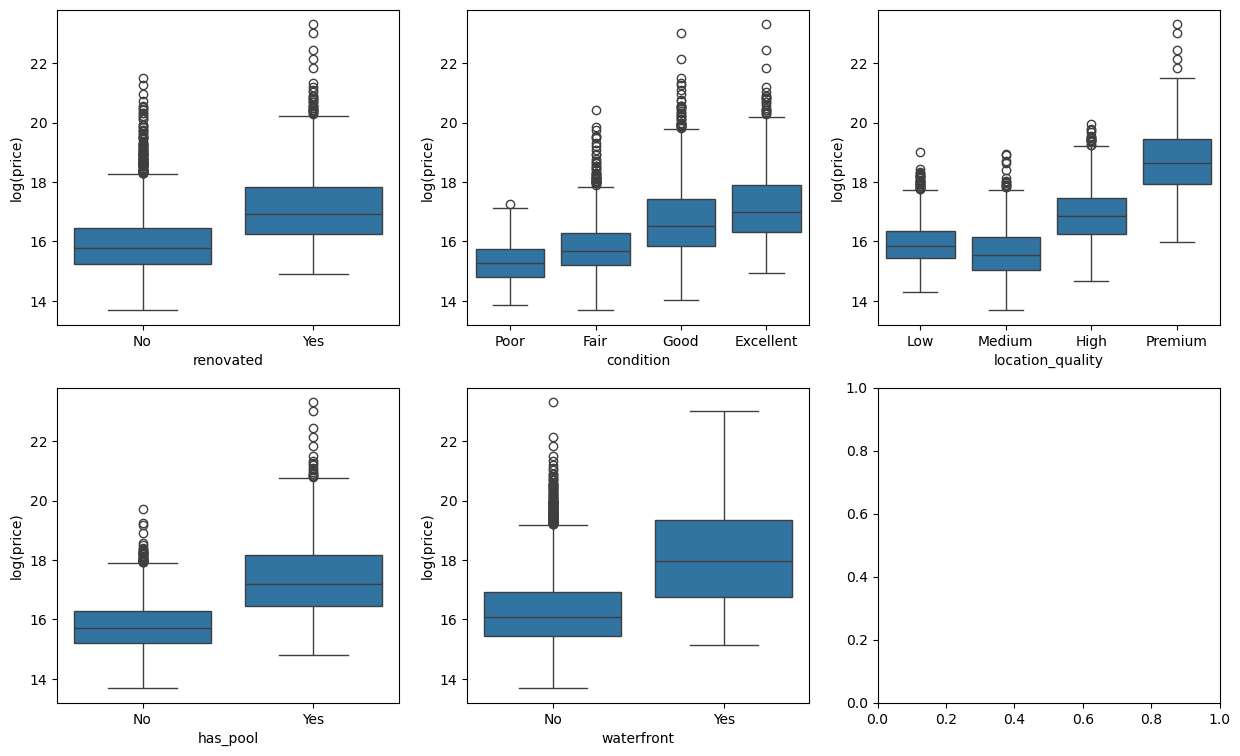

In [26]:
for col in categorical:
    df[col] = df[col].str.strip().str.title()

cond_order = ['Poor', 'Fair', 'Good', 'Excellent']
loc_order = ['Low', 'Medium', 'High', 'Premium']
renovated_order = ['No', 'Yes']
pool_order = ['No', 'Yes']
waterfront_order = ['No', 'Yes']    
df['renovated'] = df['renovated'].astype(CategoricalDtype(categories=renovated_order, ordered=True))
df['condition'] = df['condition'].astype(CategoricalDtype(categories=cond_order, ordered=True))
df['location_quality'] = df['location_quality'].astype(CategoricalDtype(categories=loc_order, ordered=True))
df['has_pool'] = df['has_pool'].astype(CategoricalDtype(categories=pool_order, ordered=True))
df['waterfront'] = df['waterfront'].astype(CategoricalDtype(categories=waterfront_order, ordered=True))

fig, axes = plt.subplots(2,3, figsize = (15,9))
axes =axes.ravel()
for i, cols in enumerate(df[categorical].columns):
    sns.boxplot(x=cols, y='transformed_price', data=df, ax=axes[i])
    axes[i].set_xlabel(cols)
    axes[i].set_ylabel('log(price)')


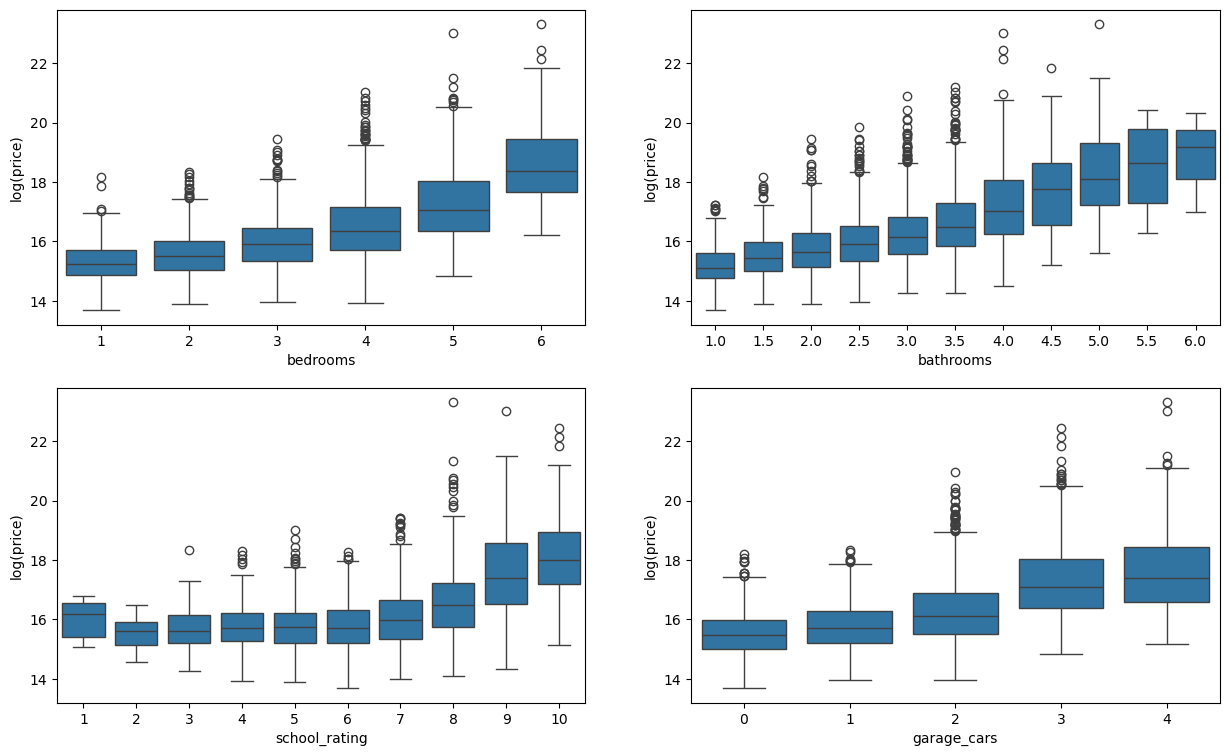

In [27]:
fig, axes = plt.subplots(2,2, figsize = (15,9))
axes =axes.ravel()
for i, cols in enumerate(df[discrete_numerical].columns):
    sns.boxplot(x=cols, y='transformed_price', data=df, ax=axes[i])
    axes[i].set_xlabel(cols)
    axes[i].set_ylabel('log(price)')

In [28]:
df[numerical].corr()

,price,size_sqft,lot_sqft,house_age,years_since_renovated,dist_center_km,crime_rate,transformed_price,bedrooms,bathrooms,school_rating,garage_cars
price,1.000000,0.218608,0.215027,-0.121895,0.025659,-0.137580,-0.164744,0.382340,0.171364,0.158374,0.142113,0.151004
size_sqft,0.218608,1.000000,0.816043,-0.505106,-0.047361,-0.652350,-0.655882,0.666527,0.701484,0.535581,0.597656,0.459277
lot_sqft,0.215027,0.816043,1.000000,-0.410622,-0.041328,-0.530869,-0.531443,0.563986,0.566906,0.425763,0.482418,0.377827
house_age,-0.121895,-0.505106,-0.410622,1.000000,0.077197,0.589437,0.575748,-0.473249,-0.350077,-0.269892,-0.508216,-0.246225
years_since_renovated,0.025659,-0.047361,-0.041328,0.077197,1.000000,0.035090,0.056762,0.185060,-0.034760,-0.026549,-0.034483,-0.021955
dist_center_km,-0.137580,-0.652350,-0.530869,0.589437,0.035090,1.000000,0.723975,-0.412164,-0.463226,-0.353298,-0.661632,-0.341898
crime_rate,-0.164744,-0.655882,-0.531443,0.575748,0.056762,0.723975,1.000000,-0.490854,-0.468764,-0.356849,-0.651270,-0.337060
transformed_price,0.382340,0.666527,0.563986,-0.473249,0.185060,-0.412164,-0.490854,1.000000,0.576331,0.529307,0.486427,0.549767
bedrooms,0.171364,0.701484,0.566906,-0.350077,-0.034760,-0.463226,-0.468764,0.576331,1.000000,0.766869,0.433914,0.322480
bathrooms,0.158374,0.535581,0.425763,-0.269892,-0.026549,-0.353298,-0.356849,0.529307,0.766869,1.000000,0.344319,0.238366


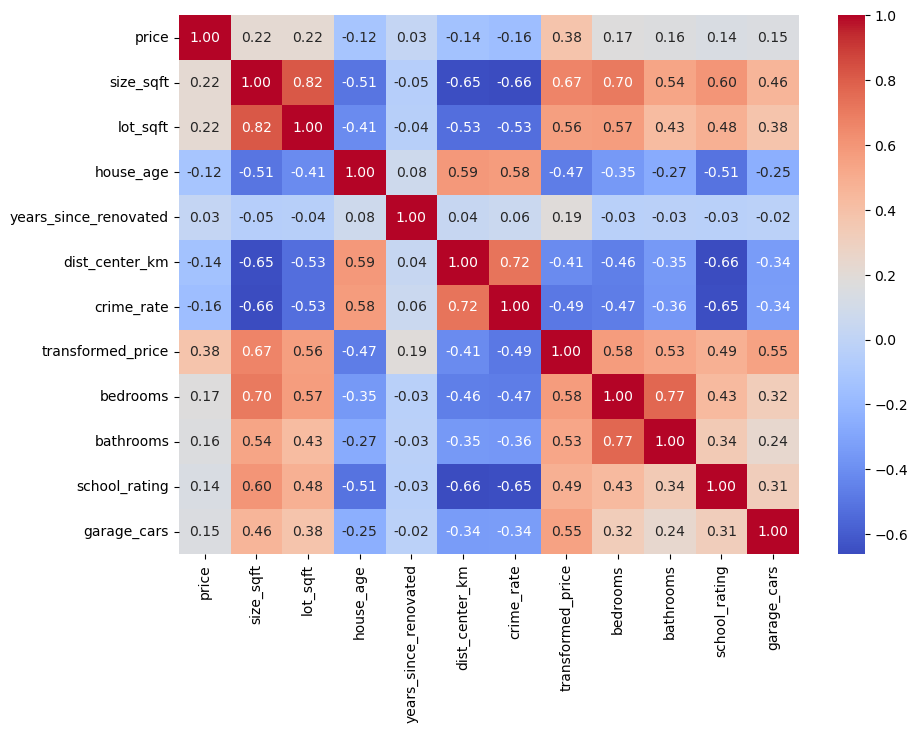

In [29]:
plt.figure(figsize=(10,7))
sns.heatmap(df[numerical].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


In [30]:
df_dummy = pd.get_dummies(df, drop_first=True)

In [31]:
from statsmodels.formula.api import ols
y_name = 'price'
X_names = [col for col in df_dummy.drop(columns=['transformed_price']).columns if col != y_name]

formula_str = y_name+" ~ "+" + ".join(X_names)

In [32]:
model = ols(formula=formula_str, data=df_dummy)
fitted = model.fit()

In [33]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     28.40
Date:                Fri, 09 Jan 2026   Prob (F-statistic):           1.86e-95
Time:                        01:50:10   Log-Likelihood:                -83650.
No. Observations:                4000   AIC:                         1.673e+05
Df Residuals:                    3980   BIC:                         1.675e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

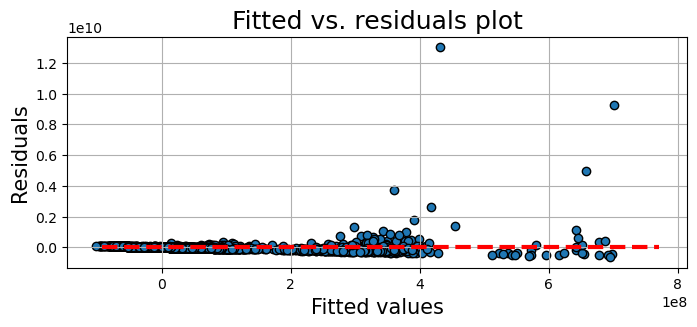

In [34]:
plt.figure(figsize=(8,3))
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid,edgecolor='k')
xmin = min(fitted.fittedvalues)
xmax = max(fitted.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

here in breuschpagan test our null hyphotesis is that there is not hetroskedascity in the model and if p value is less than 0.05 that means we have to reject the null hypothesis and its an evidence for heteroskedascity

In [35]:
from statsmodels.stats.diagnostic import het_breuschpagan

\
lm_stat, lm_pvalue, f_stat, f_pvalue = het_breuschpagan(fitted.resid, fitted.model.exog)

print("Breusch-Pagan test results")
print(f"LM stat:   {lm_stat:.4f}")
print(f"LM p-value:{lm_pvalue:.4e}")
print(f"F stat:    {f_stat:.4f}")
print(f"F p-value: {f_pvalue:.4e}")


Breusch-Pagan test results
LM stat:   66.1453
LM p-value:3.9729e-07
F stat:    3.5222
F p-value: 3.4680e-07


In [36]:
from scipy.stats import boxcox

y_bc, lambda_hat = boxcox(df_dummy['price'])
df_dummy['price_boxcox'] = y_bc  
df_dummy = df_dummy.rename(columns={'transformed_price':'price_log'})

print("Estimated lambda:", lambda_hat)


Estimated lambda: -0.2719136020513787


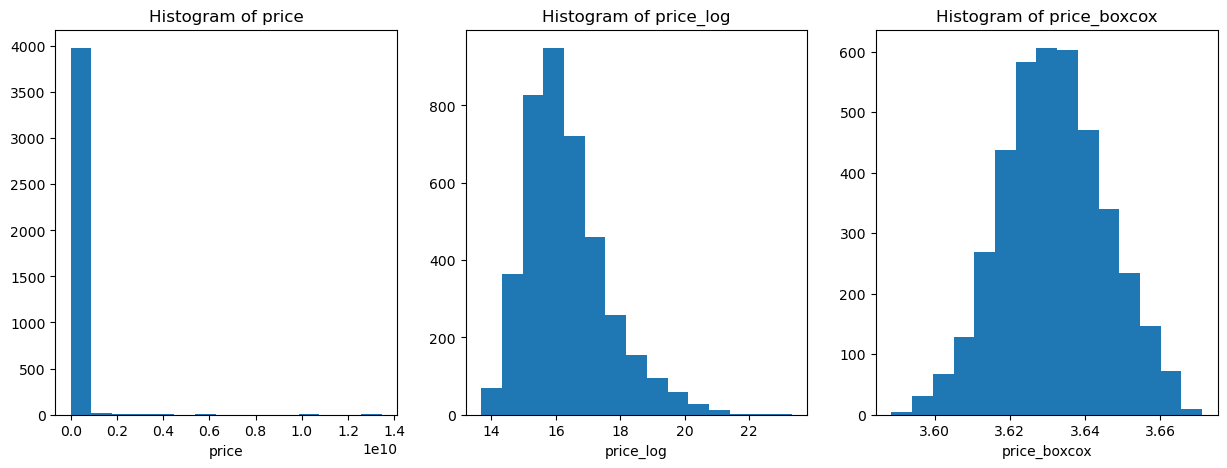

In [37]:
fig, axes = plt.subplots(1,3, figsize = (15,5))
axes = axes.ravel()
for i, col in enumerate(['price', 'price_log', 'price_boxcox']):
    axes[i].hist(df_dummy[col], bins=15)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)

In [38]:
y_name_boxcox = 'price_boxcox'
y_name_log = 'price_log'

X_names = [col for col in df_dummy.columns if col not in ['price', 'price_boxcox', 'price_log']]
formula_boxcox = y_name_boxcox + ' ~ ' + ' + '.join(X_names)
formula_log = y_name_log + ' ~ ' + ' + '.join(X_names)


In [39]:
model_log = ols(formula=formula_log, data=df_dummy)
fitted_log = model_log.fit()
print(fitted_log.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1392.
Date:                Fri, 09 Jan 2026   Prob (F-statistic):               0.00
Time:                        01:50:12   Log-Likelihood:                -2561.2
No. Observations:                4000   AIC:                             5162.
Df Residuals:                    3980   BIC:                             5288.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [40]:
lm_stat, lm_pvalue, f_stat, f_pvalue = het_breuschpagan(fitted_log.resid, fitted_log.model.exog)

print("Breusch-Pagan test results for log transformation model")
print(f"LM stat:   {lm_stat}")
print(f"LM p-value:{lm_pvalue}")
print(f"F stat:    {f_stat}")
print(f"F p-value: {f_pvalue}")


Breusch-Pagan test results for log transformation model
LM stat:   790.0412294096761
LM p-value:2.8106338868602025e-155
F stat:    51.55606623951239
F p-value: 6.715277254391822e-174


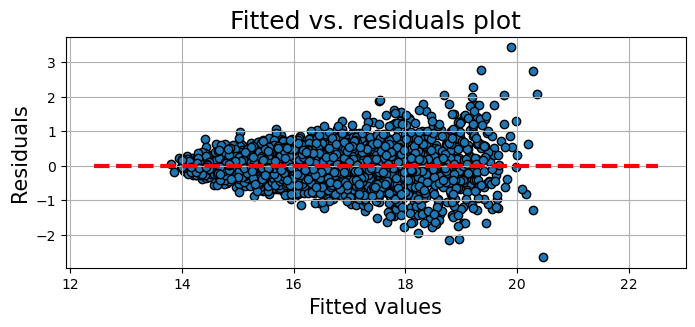

In [41]:
plt.figure(figsize=(8,3))
p=plt.scatter(x=fitted_log.fittedvalues,y=fitted_log.resid,edgecolor='k')
xmin = min(fitted_log.fittedvalues)
xmax = max(fitted_log.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

In [42]:
df

,price,size_sqft,lot_sqft,bedrooms,bathrooms,renovated,condition,location_quality,dist_center_km,crime_rate,school_rating,has_pool,garage_cars,waterfront,transformed_price,years_since_renovated,house_age
0,18389800,2588,3901,4,4.0,No,Fair,Medium,16.93,42.8,6,No,3,No,16.727307,0.0,25
1,22831700,2363,4640,5,3.5,No,Good,Medium,17.68,30.5,8,Yes,3,No,16.943660,0.0,29
2,4196200,1050,2000,2,2.5,No,Poor,Medium,24.38,37.0,7,No,0,Yes,15.249690,0.0,65
3,124268900,3381,9221,5,4.5,No,Fair,Premium,2.71,6.5,10,Yes,3,No,18.637958,0.0,27
4,14971300,1991,6869,3,1.5,No,Fair,Premium,4.55,23.4,10,No,1,No,16.521646,0.0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,13396000,2467,3706,5,4.0,No,Fair,High,11.16,41.8,9,No,0,No,16.410467,0.0,17
3996,3625100,1131,3640,1,1.5,Yes,Good,Medium,22.73,33.1,5,No,1,No,15.103392,14.0,36
3997,9704300,1008,3838,3,2.0,Yes,Excellent,High,11.55,8.4,7,No,0,No,16.088080,2.0,8
3998,75418600,3572,9032,6,4.0,Yes,Good,Premium,3.06,11.3,9,Yes,3,No,18.138564,2.0,10


In [43]:
model_boxcox = ols(formula=formula_boxcox, data=df_dummy)
fitted_boxcox = model_boxcox.fit()
print(fitted_boxcox.summary())

                            OLS Regression Results                            
Dep. Variable:           price_boxcox   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1486.
Date:                Fri, 09 Jan 2026   Prob (F-statistic):               0.00
Time:                        01:50:13   Log-Likelihood:                 15641.
No. Observations:                4000   AIC:                        -3.124e+04
Df Residuals:                    3980   BIC:                        -3.112e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [44]:
lm_stat, lm_pvalue, f_stat, f_pvalue = het_breuschpagan(fitted_boxcox.resid, fitted_boxcox.model.exog)

print("Breusch-Pagan test results for boxcox transformation model")
print(f"LM stat:   {lm_stat}")
print(f"LM p-value:{lm_pvalue}")
print(f"F stat:    {f_stat}")
print(f"F p-value: {f_pvalue}")


Breusch-Pagan test results for boxcox transformation model
LM stat:   71.59524862822408
LM p-value:4.984793552497672e-08
F stat:    3.817661735819289
F p-value: 4.20611627331078e-08


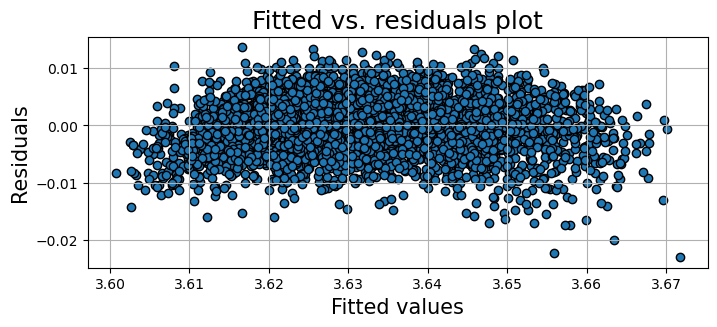

In [45]:
plt.figure(figsize=(8,3))
p=plt.scatter(x=fitted_boxcox.fittedvalues,y=fitted_boxcox.resid,edgecolor='k')
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

In [46]:
formula_full = (
    'price_boxcox ~ size_sqft + lot_sqft + bedrooms + bathrooms + house_age + years_since_renovated + '
    'dist_center_km + crime_rate + school_rating + garage_cars + '
    'renovated_Yes + condition_Fair + condition_Good + condition_Excellent + '
    'location_quality_Medium + location_quality_High + location_quality_Premium + '
    'has_pool_Yes + waterfront_Yes + '
    'size_sqft:location_quality_Medium + size_sqft:location_quality_High + size_sqft:location_quality_Premium + '
    'house_age:renovated_Yes + bedrooms:bathrooms + lot_sqft:waterfront_Yes + '
    'bedrooms:school_rating'
)
model_full = ols(formula=formula_full, data=df_dummy)
fitted_full = model_full.fit()
print(fitted_full.summary())


                            OLS Regression Results                            
Dep. Variable:           price_boxcox   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1131.
Date:                Fri, 09 Jan 2026   Prob (F-statistic):               0.00
Time:                        01:50:14   Log-Likelihood:                 15716.
No. Observations:                4000   AIC:                        -3.138e+04
Df Residuals:                    3973   BIC:                        -3.121e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [47]:
anova_table = sm.stats.anova_lm(fitted_full, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
renovated_Yes,1.0,1.516318e-01,1.516318e-01,6653.917401,0.000000e+00
condition_Fair,1.0,5.697554e-03,5.697554e-03,250.020407,1.156220e-54
condition_Good,1.0,3.319152e-02,3.319152e-02,1456.512202,8.599096e-272
condition_Excellent,1.0,4.953010e-02,4.953010e-02,2173.482880,0.000000e+00
location_quality_Medium,1.0,1.532679e-01,1.532679e-01,6725.712288,0.000000e+00
location_quality_High,1.0,7.044967e-04,7.044967e-04,30.914763,2.873330e-08
location_quality_Premium,1.0,8.175117e-02,8.175117e-02,3587.409561,0.000000e+00
has_pool_Yes,1.0,7.630518e-02,7.630518e-02,3348.428480,0.000000e+00
waterfront_Yes,1.0,3.929559e-03,3.929559e-03,172.437130,1.367427e-38
size_sqft,1.0,2.905087e-02,2.905087e-02,1274.812076,2.096364e-242


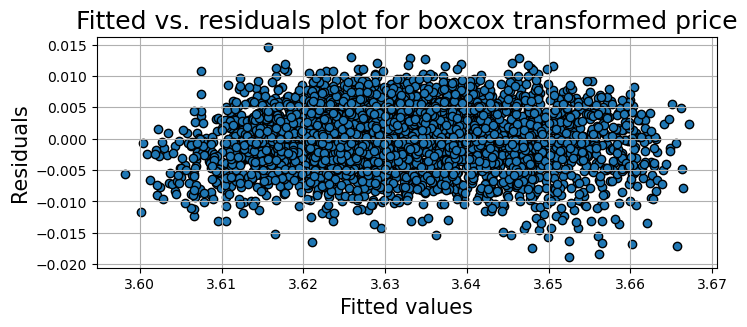

In [48]:
plt.figure(figsize=(8,3))
p=plt.scatter(x=fitted_full.fittedvalues,y=fitted_full.resid,edgecolor='k')
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot for boxcox transformed price",fontsize=18)
plt.grid(True)
plt.show()

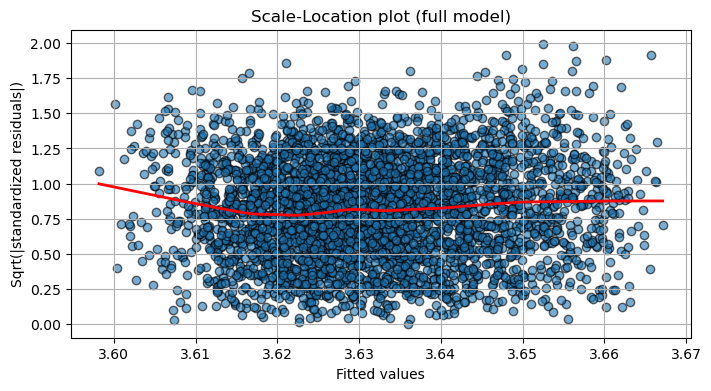

In [49]:

fitted_vals = fitted_full.fittedvalues
influence = fitted_full.get_influence()
std_resid = influence.resid_studentized_internal       # standardized residuals
sqrt_std_resid = np.sqrt(np.abs(std_resid))            # sqrt of absolute standardized residuals

plt.figure(figsize=(8,4))
plt.scatter(fitted_vals, sqrt_std_resid, edgecolor='k', alpha=0.6)
lowess_sm = sm.nonparametric.lowess(sqrt_std_resid, fitted_vals, frac=0.3)
plt.plot(lowess_sm[:,0], lowess_sm[:,1], color='red', lw=2)
plt.xlabel('Fitted values')
plt.ylabel('Sqrt(|standardized residuals|)')
plt.title('Scale-Location plot (full model)')
plt.grid(True)
plt.show()


In [50]:
lm_stat, lm_pvalue, f_stat, f_pvalue = het_breuschpagan(fitted_full.resid, fitted_full.model.exog)

print("Breusch-Pagan test (full model)")
print(f"LM stat:   {lm_stat}")
print(f"LM p-value:{lm_pvalue}")
print(f"F stat:    {f_stat}")
print(f"F p-value: {f_pvalue}")

Breusch-Pagan test (full model)
LM stat:   76.70149619486865
LM p-value:6.693565702688838e-07
F stat:    2.9874297402345418
F p-value: 5.711833912349265e-07


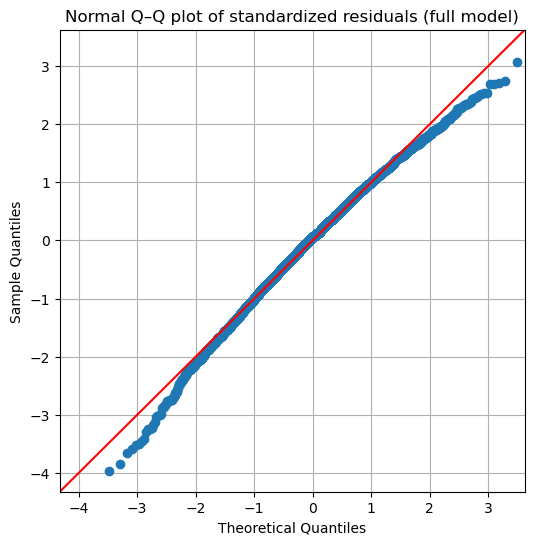

In [51]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

resid = influence.resid
# get standardized residuals (use existing variable if present)

# Normal Q–Q plot
plt.figure(figsize=(6,6))
qqplot(resid, line='45', fit=True, ax=plt.gca())
plt.title('Normal Q–Q plot of standardized residuals (full model)')
plt.grid(True)
plt.show()

In [52]:
# Shapiro–Wilk test
sw_stat, sw_p = shapiro(resid)
print(f"Shapiro–Wilk test statistic: {sw_stat:.4f}, p-value: {sw_p:.4e}")
if sw_p < 0.05:
    print("p < 0.05 -> reject H0: evidence that residuals are not normally distributed")
else:
    print("p >= 0.05 -> fail to reject H0: no evidence against normality of residuals")

Shapiro–Wilk test statistic: 0.9945, p-value: 3.0350e-11
p < 0.05 -> reject H0: evidence that residuals are not normally distributed


In [53]:
df_dummy

,price,size_sqft,lot_sqft,bedrooms,bathrooms,dist_center_km,crime_rate,school_rating,garage_cars,price_log,years_since_renovated,house_age,renovated_Yes,condition_Fair,condition_Good,condition_Excellent,location_quality_Medium,location_quality_High,location_quality_Premium,has_pool_Yes,waterfront_Yes,price_boxcox
0,18389800,2588,3901,4,4.0,16.93,42.8,6,3,16.727307,0.0,25,False,True,False,False,True,False,False,False,False,3.638713
1,22831700,2363,4640,5,3.5,17.68,30.5,8,3,16.943660,0.0,29,False,False,True,False,True,False,False,True,False,3.640937
2,4196200,1050,2000,2,2.5,24.38,37.0,7,0,15.249690,0.0,65,False,False,False,False,True,False,False,False,True,3.619465
3,124268900,3381,9221,5,4.5,2.71,6.5,10,3,18.637958,0.0,27,False,True,False,False,False,False,True,True,False,3.654486
4,14971300,1991,6869,3,1.5,4.55,23.4,10,1,16.521646,0.0,31,False,True,False,False,False,False,True,False,False,3.636475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,13396000,2467,3706,5,4.0,11.16,41.8,9,0,16.410467,0.0,17,False,True,False,False,False,True,False,False,False,3.635211
3996,3625100,1131,3640,1,1.5,22.73,33.1,5,1,15.103392,14.0,36,True,False,True,False,True,False,False,False,False,3.617105
3997,9704300,1008,3838,3,2.0,11.55,8.4,7,0,16.088080,2.0,8,True,False,False,True,False,True,False,False,False,3.631324
3998,75418600,3572,9032,6,4.0,3.06,11.3,9,3,18.138564,2.0,10,True,False,True,False,False,False,True,True,False,3.651119


/home/kala/anaconda3/envs/data/lib/python3.13/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/kala/anaconda3/envs/data/lib/python3.13/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/kala/anaconda3/envs/data/lib/python3.13/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


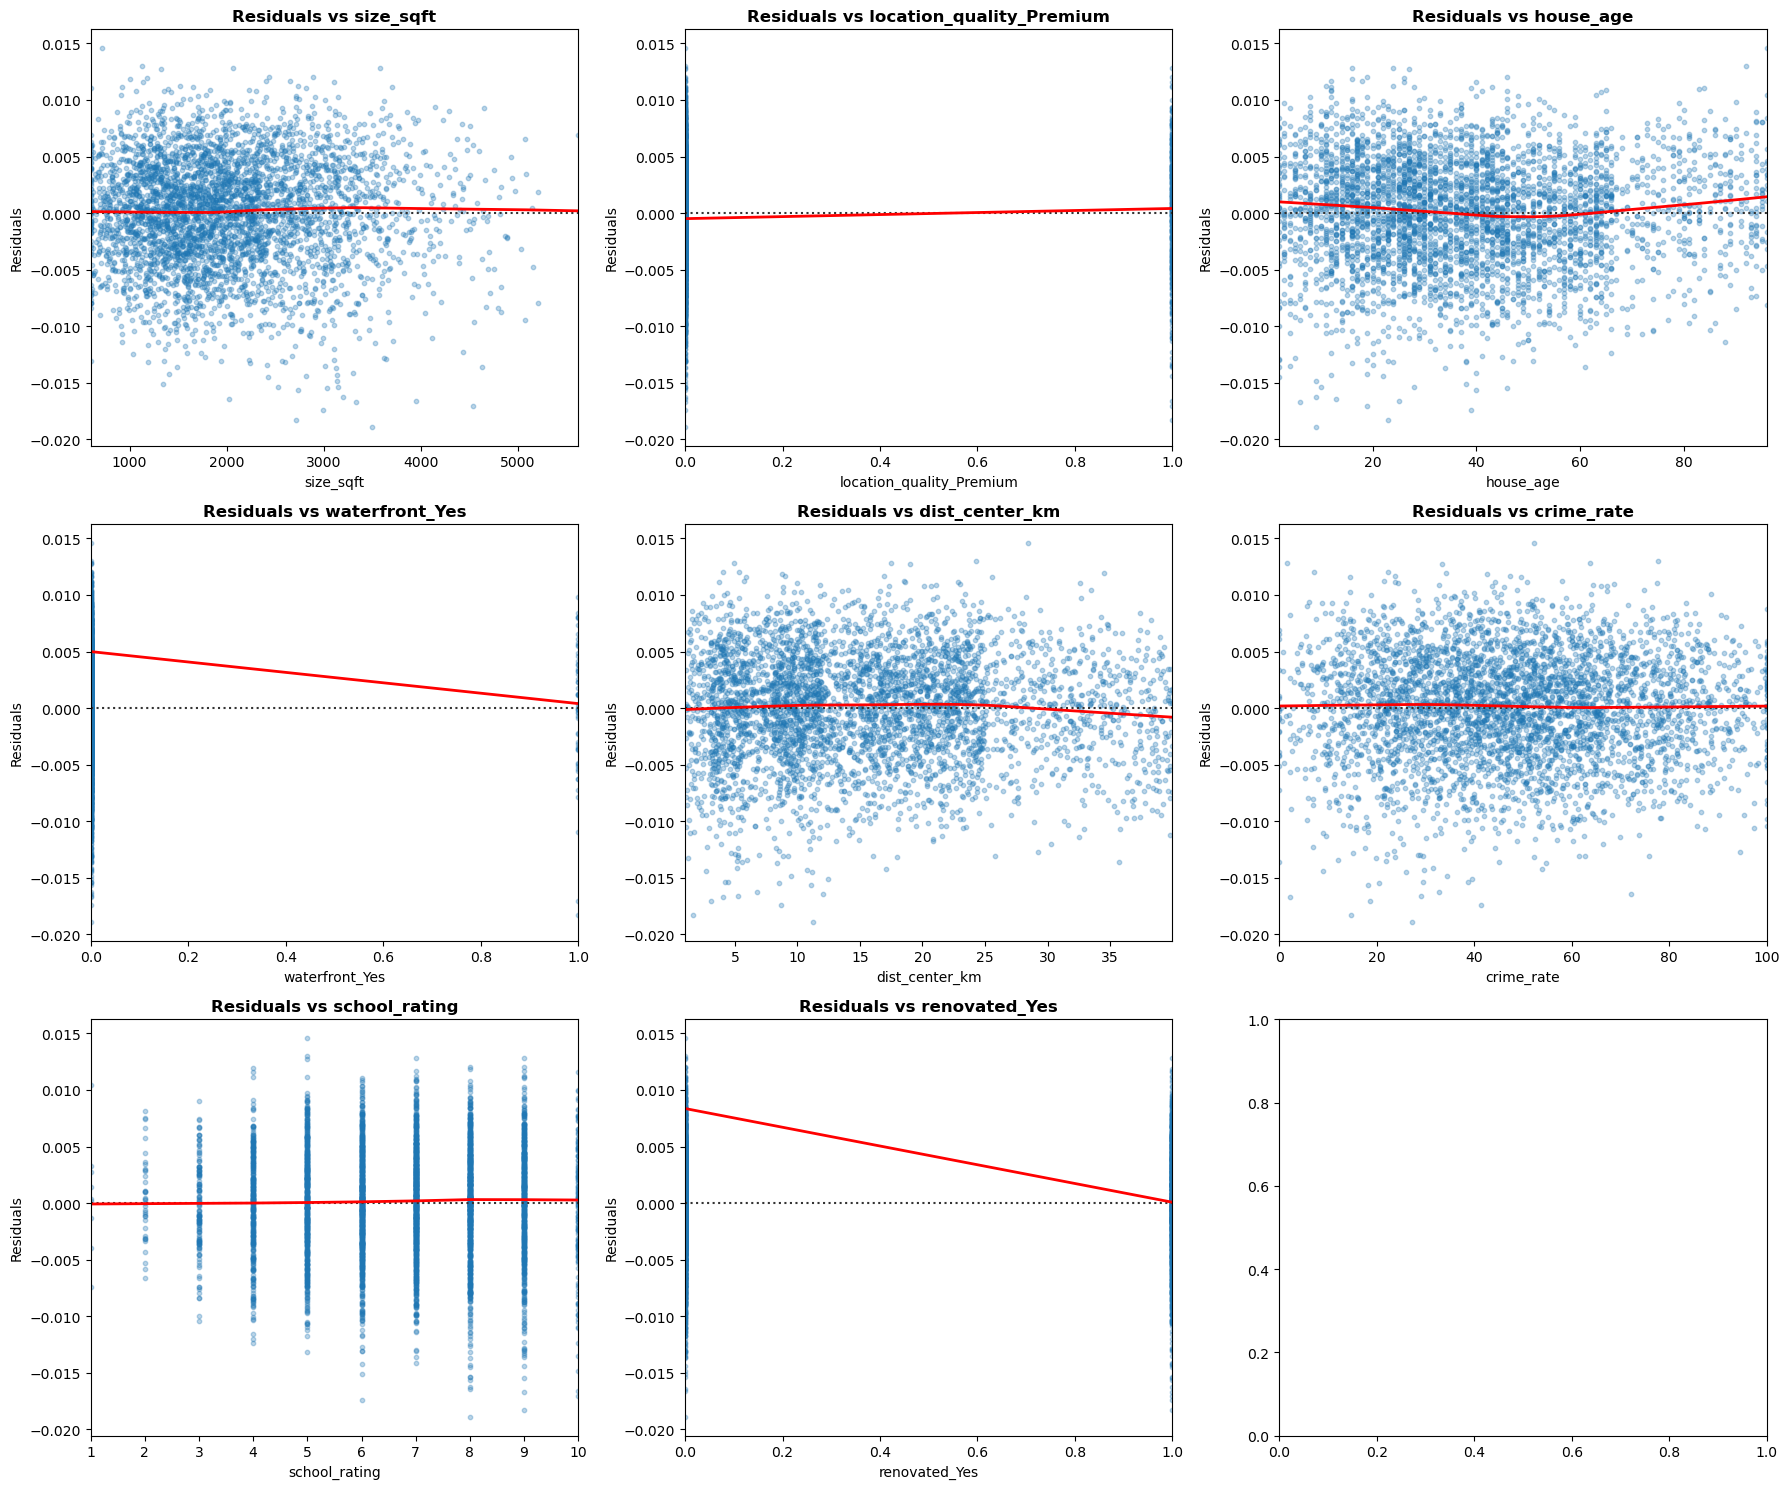

In [54]:


# 1. Get the names of the top 9 variables from your ANOVA table
# We exclude 'Residual' and take the top 9 by sum_sq
important_predictor = ['size_sqft', 'location_quality_Premium', 'house_age', 'waterfront_Yes',  'dist_center_km', 'crime_rate', 'school_rating', 'renovated_Yes']

# 2. Setup a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(important_predictor):
    # sns.residplot is perfect for this—it shows the scatter + a trend line
    sns.residplot(x=df_dummy[col], y=fitted_full.resid, lowess=True, 
                  ax=axes[i], 
                  scatter_kws={'alpha': 0.3, 's': 10}, 
                  line_kws={'color': 'red', 'lw': 2})
    
    axes[i].set_title(f'Residuals vs {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

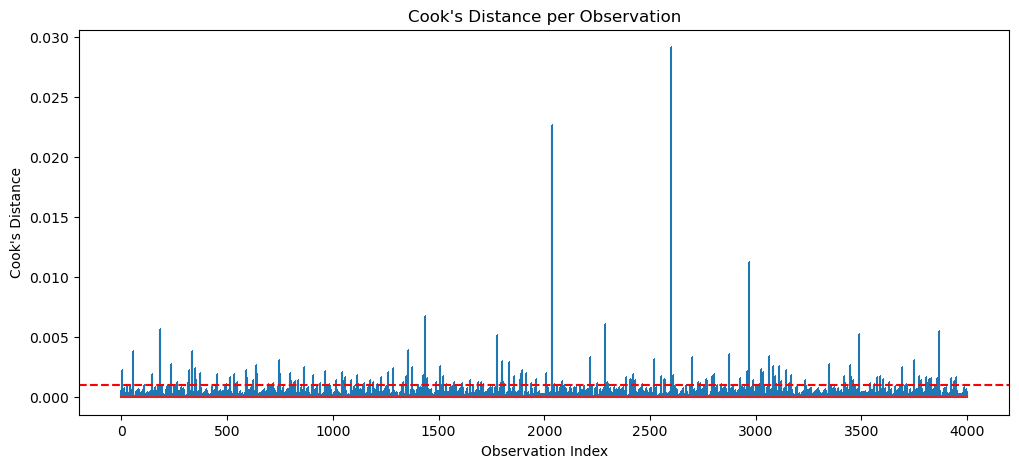

In [55]:

# 2. Extract Cook's distance and Leverage
(c, p) = influence.cooks_distance
leverage = influence.hat_matrix_diag

# 3. Create a Dataframe to identify specific houses
influence_df = pd.DataFrame({
    'cooks_d': c,
    'leverage': leverage,
    'is_waterfront': df_dummy['waterfront_Yes']  # Adjust column name to match your df
})

# 4. Plot Cook's Distance
plt.figure(figsize=(12, 5))
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.title("Cook's Distance per Observation")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
# Draw a threshold line at 4/n
plt.axhline(y=4/len(df_dummy), color='r', linestyle='--')
plt.show()

# 5. Influence Plot (Leverage vs Residuals)


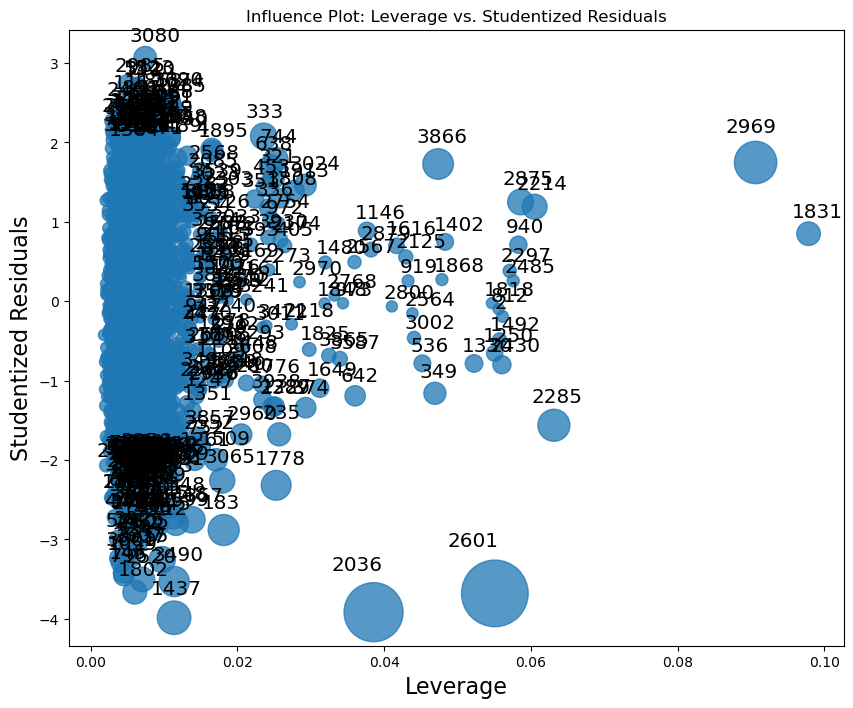

In [56]:
fig, ax = plt.subplots(figsize=(10, 8))
sm.graphics.influence_plot(fitted_full, ax=ax, criterion="cooks")
plt.title("Influence Plot: Leverage vs. Studentized Residuals")
plt.show()

In [57]:
# Set a threshold for Cook's Distance (commonly 4/n)
threshold = 4 / len(df_dummy)

# Find highly influential observations
influential_points = influence_df[influence_df['cooks_d'] > threshold].sort_values('cooks_d', ascending=False)

# Check how many are waterfront
waterfront_influence = influential_points[influential_points['is_waterfront'] == 1]

print(f"Total influential observations: {len(influential_points)}")
print(f"Number of influential waterfront properties: {len(waterfront_influence)}")
print("\nTop 5 Most Influential Waterfront Properties:")
print(waterfront_influence.head(5))

Total influential observations: 194
Number of influential waterfront properties: 28

Top 5 Most Influential Waterfront Properties:
       cooks_d  leverage  is_waterfront
2601  0.029143  0.055089           True
2036  0.022700  0.038560           True
2969  0.011274  0.090627           True
2285  0.006086  0.063137           True
3866  0.005501  0.047361           True


In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Use the design matrix from the fitted model
X = fitted_full.model.exog
names = fitted_full.model.exog_names

vifs = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
df_vif = pd.DataFrame({'feature': names, 'VIF': vifs})

# Drop the intercept and sort
df_vif = df_vif[df_vif['feature'] != 'Intercept'].sort_values('VIF', ascending=False)
df_vif

,feature,VIF
12,size_sqft:location_quality_High[T.True],63.345833
26,bedrooms:school_rating,57.604247
13,size_sqft:location_quality_Premium[T.True],56.854219
11,size_sqft:location_quality_Medium[T.True],35.930785
6,location_quality_High[T.True],35.037552
25,bedrooms:bathrooms,34.839523
7,location_quality_Premium[T.True],29.536629
10,size_sqft,26.782054
16,bedrooms,26.016282
5,location_quality_Medium[T.True],23.521977


In [59]:
from statsmodels.stats.diagnostic import het_white

white_stat, white_pvalue, white_fstat, white_fpvalue = het_white(fitted_full.resid, fitted_full.model.exog)

print("White test (full model)")
print(f"LM stat:   {white_stat:.4f}")
print(f"LM p-value:{white_pvalue:.4e}")
print(f"F stat:    {white_fstat:.4f}")
print(f"F p-value: {white_fpvalue:.4e}")

White test (full model)
LM stat:   525.6519
LM p-value:6.9142e-12
F stat:    1.7219
F p-value: 3.7692e-13


In [60]:
df_dummy

,price,size_sqft,lot_sqft,bedrooms,bathrooms,dist_center_km,crime_rate,school_rating,garage_cars,price_log,years_since_renovated,house_age,renovated_Yes,condition_Fair,condition_Good,condition_Excellent,location_quality_Medium,location_quality_High,location_quality_Premium,has_pool_Yes,waterfront_Yes,price_boxcox
0,18389800,2588,3901,4,4.0,16.93,42.8,6,3,16.727307,0.0,25,False,True,False,False,True,False,False,False,False,3.638713
1,22831700,2363,4640,5,3.5,17.68,30.5,8,3,16.943660,0.0,29,False,False,True,False,True,False,False,True,False,3.640937
2,4196200,1050,2000,2,2.5,24.38,37.0,7,0,15.249690,0.0,65,False,False,False,False,True,False,False,False,True,3.619465
3,124268900,3381,9221,5,4.5,2.71,6.5,10,3,18.637958,0.0,27,False,True,False,False,False,False,True,True,False,3.654486
4,14971300,1991,6869,3,1.5,4.55,23.4,10,1,16.521646,0.0,31,False,True,False,False,False,False,True,False,False,3.636475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,13396000,2467,3706,5,4.0,11.16,41.8,9,0,16.410467,0.0,17,False,True,False,False,False,True,False,False,False,3.635211
3996,3625100,1131,3640,1,1.5,22.73,33.1,5,1,15.103392,14.0,36,True,False,True,False,True,False,False,False,False,3.617105
3997,9704300,1008,3838,3,2.0,11.55,8.4,7,0,16.088080,2.0,8,True,False,False,True,False,True,False,False,False,3.631324
3998,75418600,3572,9032,6,4.0,3.06,11.3,9,3,18.138564,2.0,10,True,False,True,False,False,False,True,True,False,3.651119


In [61]:
print(fitted_full.summary())

                            OLS Regression Results                            
Dep. Variable:           price_boxcox   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1131.
Date:                Fri, 09 Jan 2026   Prob (F-statistic):               0.00
Time:                        01:50:53   Log-Likelihood:                 15716.
No. Observations:                4000   AIC:                        -3.138e+04
Df Residuals:                    3973   BIC:                        -3.121e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

/home/kala/anaconda3/envs/data/lib/python3.13/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "price". Fall back to string conversion. The error is: integer 13449893600 does not fit 'int'
  warnings.warn('Error while trying to convert '


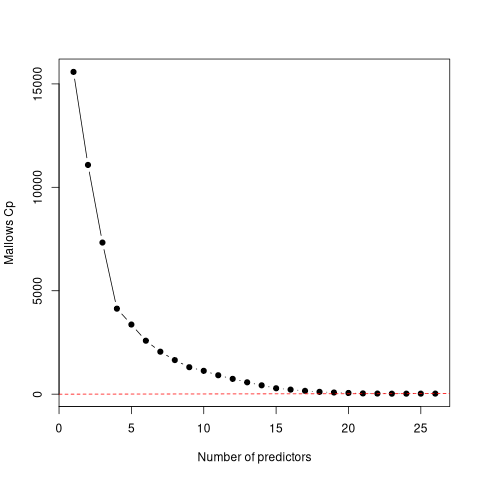

In [62]:
%%R -i df_dummy -i formula_full -o selected_vars_mallow_c -o candidates

library(leaps)
best_fit <- regsubsets(as.formula(formula_full), data = df_dummy, nvmax = 26,  nbest = 1)
best_sum <- summary(best_fit)
best_index <- which.min(best_sum$cp)
selected_vars_mallow_c <- names(which(best_sum$which[best_index, ]))[-1]

candidates <- data.frame(
  p = 1:length(best_sum$cp),
  Cp = best_sum$cp,
  AdjR2 = best_sum$adjr2
)

plot(best_sum$cp,
     xlab = "Number of predictors",
     ylab = "Mallows Cp",
     type = "b",
     pch = 19)

abline(a = 0, b = 1, col = "red", lty = 2)  # Cp = p line




In [63]:
candidates

,p,Cp,AdjR2
1,1,15579.934596,0.413491
2,2,11083.100255,0.548166
3,3,7329.524090,0.660629
4,4,4132.452177,0.756463
5,5,3366.474723,0.779434
6,6,2583.609607,0.802923
7,7,2053.127060,0.818852
8,8,1647.266655,0.831047
9,9,1304.177863,0.841365
10,10,1127.286582,0.846697


In [64]:
%%R -i df_dummy -i formula_full -o selected_vars_forward_aic
library(stats)

# Convert string to formula
full_formula <- as.formula(formula_full)

# Forward selection starting from intercept-only
step_model <- step(lm(price_boxcox ~ 1, data=df_dummy),
                   scope = full_formula,
                   direction = "forward",
                   trace = TRUE)

# Show selected variables
selected_vars_forward_aic <- names(coef(step_model))[-1]  # drop intercept



/home/kala/anaconda3/envs/data/lib/python3.13/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "price". Fall back to string conversion. The error is: integer 13449893600 does not fit 'int'
  warnings.warn('Error while trying to convert '


Start:  AIC=-34267.75
price_boxcox ~ 1

                           Df Sum of Sq     RSS    AIC
+ size_sqft                 1  0.303438 0.45736 -36301
+ has_pool_Yes              1  0.264032 0.49677 -35971
+ bedrooms                  1  0.251787 0.50901 -35873
+ garage_cars               1  0.235052 0.52575 -35744
+ lot_sqft                  1  0.215300 0.54550 -35596
+ bathrooms                 1  0.215189 0.54561 -35596
+ location_quality_Premium  1  0.206865 0.55393 -35535
+ location_quality_Medium   1  0.175748 0.58505 -35316
+ house_age                 1  0.170590 0.59021 -35281
+ school_rating             1  0.163952 0.59685 -35237
+ crime_rate                1  0.157091 0.60371 -35191
+ renovated_Yes             1  0.151632 0.60917 -35155
+ dist_center_km            1  0.106309 0.65449 -34868
+ condition_Excellent       1  0.091105 0.66969 -34776
+ location_quality_High     1  0.078945 0.68185 -34704
+ condition_Fair            1  0.067634 0.69316 -34638
+ condition_Good         

In [65]:
selected_vars_forward_aic

array(['size_sqft', 'location_quality_MediumTRUE', 'renovated_YesTRUE',
       'has_pool_YesTRUE', 'bathrooms', 'garage_cars', 'house_age',
       'location_quality_HighTRUE', 'years_since_renovated',
       'dist_center_km', 'school_rating', 'waterfront_YesTRUE',
       'bedrooms', 'condition_ExcellentTRUE', 'condition_GoodTRUE',
       'condition_FairTRUE', 'lot_sqft', 'crime_rate',
       'location_quality_PremiumTRUE',
       'size_sqft:location_quality_MediumTRUE', 'bathrooms:bedrooms',
       'waterfront_YesTRUE:lot_sqft', 'school_rating:bedrooms',
       'size_sqft:location_quality_PremiumTRUE'], dtype='<U38')

In [66]:
%%R -i df_dummy -i formula_full -o selected_vars_backward_aic
library(stats)
df_dummy$price_boxcox <- as.numeric(df_dummy$price_boxcox)


# Convert string to formula
full_formula <- as.formula(formula_full)

# Forward selection starting from intercept-only
step_model <- step(lm(full_formula, data=df_dummy),
                   direction = "backward",
                   trace = TRUE)

# Show selected variables
selected_vars_backward_aic <- names(coef(step_model))[-1]  # drop intercept

/home/kala/anaconda3/envs/data/lib/python3.13/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "price". Fall back to string conversion. The error is: integer 13449893600 does not fit 'int'
  warnings.warn('Error while trying to convert '


Start:  AIC=-42730.13
price_boxcox ~ size_sqft + lot_sqft + bedrooms + bathrooms + 
    house_age + years_since_renovated + dist_center_km + crime_rate + 
    school_rating + garage_cars + renovated_Yes + condition_Fair + 
    condition_Good + condition_Excellent + location_quality_Medium + 
    location_quality_High + location_quality_Premium + has_pool_Yes + 
    waterfront_Yes + size_sqft:location_quality_Medium + size_sqft:location_quality_High + 
    size_sqft:location_quality_Premium + house_age:renovated_Yes + 
    bedrooms:bathrooms + lot_sqft:waterfront_Yes + bedrooms:school_rating

                                     Df Sum of Sq      RSS    AIC
- house_age:renovated_Yes             1 0.0000058 0.090544 -42732
- size_sqft:location_quality_High     1 0.0000187 0.090557 -42731
- size_sqft:location_quality_Premium  1 0.0000288 0.090567 -42731
<none>                                            0.090538 -42730
- bedrooms:school_rating              1 0.0001566 0.090695 -42725
- siz

In [67]:
%%R -i df_dummy -i formula_full -o selected_vars_stepwise_aic
library(stats)
df_dummy$price_boxcox <- as.numeric(df_dummy$price_boxcox)


# Convert string to formula
full_formula <- as.formula(formula_full)

# Forward selection starting from intercept-only
step_model <- step(lm(full_formula, data=df_dummy),
                   direction = "both",
                   trace = TRUE)

# Show selected variables
selected_vars_stepwise_aic <- names(coef(step_model))[-1]  # drop intercept

/home/kala/anaconda3/envs/data/lib/python3.13/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "price". Fall back to string conversion. The error is: integer 13449893600 does not fit 'int'
  warnings.warn('Error while trying to convert '


Start:  AIC=-42730.13
price_boxcox ~ size_sqft + lot_sqft + bedrooms + bathrooms + 
    house_age + years_since_renovated + dist_center_km + crime_rate + 
    school_rating + garage_cars + renovated_Yes + condition_Fair + 
    condition_Good + condition_Excellent + location_quality_Medium + 
    location_quality_High + location_quality_Premium + has_pool_Yes + 
    waterfront_Yes + size_sqft:location_quality_Medium + size_sqft:location_quality_High + 
    size_sqft:location_quality_Premium + house_age:renovated_Yes + 
    bedrooms:bathrooms + lot_sqft:waterfront_Yes + bedrooms:school_rating

                                     Df Sum of Sq      RSS    AIC
- house_age:renovated_Yes             1 0.0000058 0.090544 -42732
- size_sqft:location_quality_High     1 0.0000187 0.090557 -42731
- size_sqft:location_quality_Premium  1 0.0000288 0.090567 -42731
<none>                                            0.090538 -42730
- bedrooms:school_rating              1 0.0001566 0.090695 -42725
- siz

In [82]:
formula_mallow_c =  'price_boxcox ~ ' + ' + '.join(selected_vars_mallow_c)
formula_mallow_c = formula_mallow_c.replace("TRUE", "")
formula_forward_aic =  'price_boxcox ~ ' + ' + '.join(selected_vars_forward_aic)
formula_forward_aic = formula_forward_aic.replace("TRUE", "")
formula_stepwise_aic =  'price_boxcox ~ ' + ' + '.join(selected_vars_stepwise_aic)
formula_stepwise_aic = formula_stepwise_aic.replace("TRUE", "")

In [69]:
df_dummy['size_sqft_medium'] = df_dummy['size_sqft'] * df_dummy['location_quality_Medium'].astype(int)
formula_mallow_c = formula_mallow_c.replace('size_sqft:location_quality_Medium', 'size_sqft_medium')
df_dummy['size_sqft_premium'] = df_dummy['size_sqft'] * df_dummy['location_quality_Premium'].astype(int)
formula_mallow_c = formula_mallow_c.replace('size_sqft:location_quality_Premium', 'size_sqft_premium')
formula_mallow_c = formula_mallow_c.replace('size_sqft_Premium', 'size_sqft_premium')

model_full = ols(formula=formula_mallow_c, data=df_dummy)
fitted_mallow_c = model_full.fit()
print(fitted_mallow_c.summary())




                            OLS Regression Results                            
Dep. Variable:           price_boxcox   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1279.
Date:                Fri, 09 Jan 2026   Prob (F-statistic):               0.00
Time:                        01:51:00   Log-Likelihood:                 15716.
No. Observations:                4000   AIC:                        -3.138e+04
Df Residuals:                    3976   BIC:                        -3.123e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [70]:
formula_forward_aic

'price_boxcox ~ size_sqft + location_quality_Medium + renovated_Yes + has_pool_Yes + bathrooms + garage_cars + house_age + location_quality_High + years_since_renovated + dist_center_km + school_rating + waterfront_Yes + bedrooms + condition_Excellent + condition_Good + condition_Fair + lot_sqft + crime_rate + location_quality_Premium + size_sqft:location_quality_Medium + bathrooms:bedrooms + waterfront_Yes:lot_sqft + school_rating:bedrooms + size_sqft:location_quality_Premium'

In [71]:
model_forward_aic = ols(formula=formula_forward_aic, data=df_dummy)
fitted_forward_aic = model_forward_aic.fit()
print(fitted_forward_aic.summary())

                            OLS Regression Results                            
Dep. Variable:           price_boxcox   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1226.
Date:                Fri, 09 Jan 2026   Prob (F-statistic):               0.00
Time:                        01:51:00   Log-Likelihood:                 15716.
No. Observations:                4000   AIC:                        -3.138e+04
Df Residuals:                    3975   BIC:                        -3.122e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [72]:
model_stepwise_aic = ols(formula=formula_stepwise_aic, data=df_dummy)
fitted_stepwise_aic = model_stepwise_aic.fit()
print(fitted_stepwise_aic.summary())

                            OLS Regression Results                            
Dep. Variable:           price_boxcox   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1226.
Date:                Fri, 09 Jan 2026   Prob (F-statistic):               0.00
Time:                        01:51:01   Log-Likelihood:                 15716.
No. Observations:                4000   AIC:                        -3.138e+04
Df Residuals:                    3975   BIC:                        -3.122e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [73]:
def model_analysis(fitted_model):
    r_squared_adj = fitted_model.rsquared_adj
    residuals = fitted_model.resid
    leverage = fitted_model.get_influence().hat_matrix_diag
    press = np.sum((residuals / (1 - leverage))**2)
    return r_squared_adj, press

model_list = [fitted_mallow_c, fitted_forward_aic, fitted_stepwise_aic]
model_names = ['Mallow\'s Cp', 'Forward AIC', 'Stepwise AIC']
for i, model in enumerate(model_list):
    r_squared_adj, press = model_analysis(model)
    print(f"model {model_names[i]} Adjusted R-squared: {r_squared_adj:.4f}, PRESS: {press:.4f}")

model Mallow's Cp Adjusted R-squared: 0.8803, PRESS: 0.0917
model Forward AIC Adjusted R-squared: 0.8802, PRESS: 0.0918
model Stepwise AIC Adjusted R-squared: 0.8802, PRESS: 0.0918


In [74]:
lm_stat, lm_pvalue, f_stat, f_pvalue = het_breuschpagan(fitted_mallow_c.resid, fitted_mallow_c.model.exog)

print("Breusch-Pagan test (full model)")
print(f"LM stat:   {lm_stat}")
print(f"LM p-value:{lm_pvalue}")
print(f"F stat:    {f_stat}")
print(f"F p-value: {f_pvalue}")

Breusch-Pagan test (full model)
LM stat:   71.06735965971467
LM p-value:8.311831757209225e-07
F stat:    3.126901041616942
F p-value: 7.211960613434609e-07


In [80]:
weights

0       0.075857
1       0.075436
2       0.076296
3       0.075033
4       0.076000
          ...   
3995    0.075819
3996    0.076435
3997    0.075759
3998    0.074740
3999    0.076637
Length: 4000, dtype: float64

In [81]:
formula_mallow_c

'price_boxcox ~ size_sqft + lot_sqft + bedrooms + bathrooms + house_age + years_since_renovated + dist_center_km + crime_rate + school_rating + garage_cars + renovated_YesTRUE + condition_FairTRUE + condition_GoodTRUE + condition_ExcellentTRUE + location_quality_MediumTRUE + location_quality_HighTRUE + location_quality_PremiumTRUE + has_pool_YesTRUE + waterfront_YesTRUE + size_sqft:location_quality_MediumTRUE + size_sqft:location_quality_PremiumTRUE + bedrooms:bathrooms + lot_sqft:waterfront_YesTRUE + bedrooms:school_rating'

In [90]:
print(fitted_mallow_c.summary())

                            OLS Regression Results                            
Dep. Variable:           price_boxcox   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1279.
Date:                Fri, 09 Jan 2026   Prob (F-statistic):               0.00
Time:                        02:09:45   Log-Likelihood:                 15716.
No. Observations:                4000   AIC:                        -3.138e+04
Df Residuals:                    3976   BIC:                        -3.123e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [84]:
import statsmodels.formula.api as smf


# Assume your parsimonious formula strin
# Fit OLS first


# Compute weights: 1 / fitted^2
weights = 1 / (fitted_mallow_c.fittedvalues ** 2)

# Fit WLS
wls_model = smf.wls(formula_mallow_c, data=df_dummy, weights=weights).fit()
print(wls_model.summary())



                            WLS Regression Results                            
Dep. Variable:           price_boxcox   R-squared:                       0.881
Model:                            WLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1226.
Date:                Fri, 09 Jan 2026   Prob (F-statistic):               0.00
Time:                        01:58:43   Log-Likelihood:                 15718.
No. Observations:                4000   AIC:                        -3.139e+04
Df Residuals:                    3975   BIC:                        -3.123e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

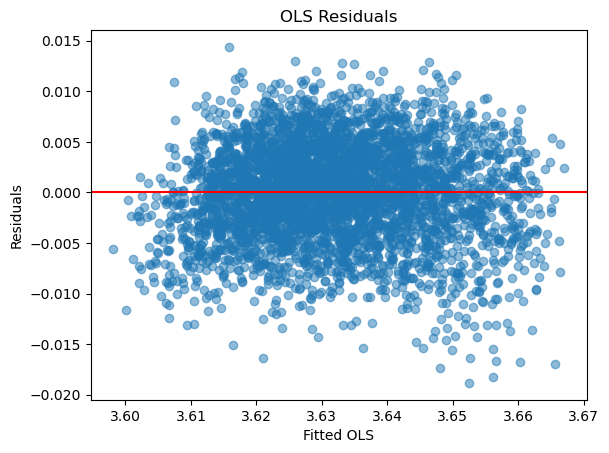

In [85]:
# Residual plots
plt.scatter(fitted_mallow_c.fittedvalues, fitted_mallow_c.resid, alpha=0.5)
plt.axhline(0, color='red')
plt.xlabel('Fitted OLS')
plt.ylabel('Residuals')
plt.title('OLS Residuals')
plt.show()



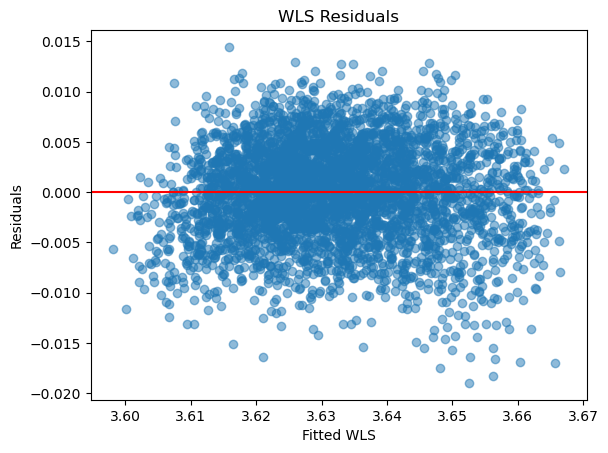

In [86]:
plt.scatter(wls_model.fittedvalues, wls_model.resid, alpha=0.5)
plt.axhline(0, color='red')
plt.xlabel('Fitted WLS')
plt.ylabel('Residuals')
plt.title('WLS Residuals')
plt.show()
# Step 1: Fit OLS residuals


In [87]:
resid_ols = fitted_mallow_c.resid

# Step 2: Estimate variance function: log(resid^2) ~ fitted values
df_dummy['_log_resid2'] = np.log(resid_ols**2)
var_model = smf.ols('_log_resid2 ~ fitted_mallow_c.fittedvalues', data=df_dummy).fit()

# Step 3: Compute estimated variance and GLS weights
sigma2_hat = np.exp(var_model.fittedvalues)
weights_fgls = 1 / sigma2_hat

# Step 4: Fit FGLS
fgls_model = smf.wls(formula_mallow_c, data=df_dummy, weights=weights_fgls).fit()
print(fgls_model.summary())

# Residual plot


                            WLS Regression Results                            
Dep. Variable:           price_boxcox   R-squared:                       0.881
Model:                            WLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1227.
Date:                Fri, 09 Jan 2026   Prob (F-statistic):               0.00
Time:                        02:00:22   Log-Likelihood:                 15731.
No. Observations:                4000   AIC:                        -3.141e+04
Df Residuals:                    3975   BIC:                        -3.125e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

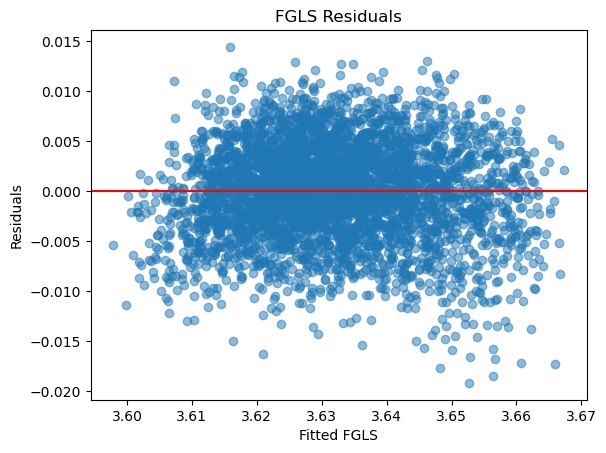

In [88]:
plt.scatter(fgls_model.fittedvalues, fgls_model.resid, alpha=0.5)
plt.axhline(0, color='red')
plt.xlabel('Fitted FGLS')
plt.ylabel('Residuals')
plt.title('FGLS Residuals')
plt.show()